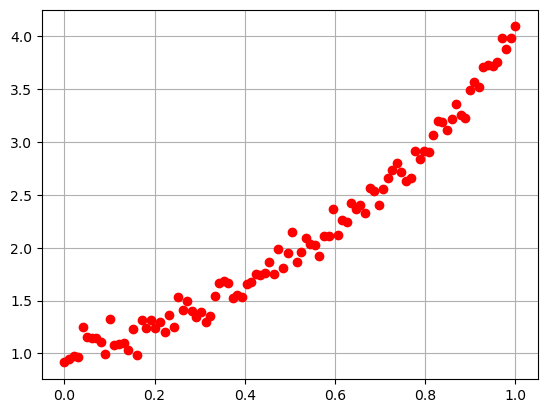

In [25]:
import numpy as np
import matplotlib.pyplot as plt


N = 10
K = 5

def vandermonde(X, K):
    N =  len(X)
    vander = np.zeros((N, K))
    for i in range(K):
        vander[:, i] = np.power(X, i)
    return vander



X = np.full((N,), 2)
vandermonde(X, K)

N = 100
K = 4


a=0
b=1


theta_true = np.ones((K,))

# Linspace of X in 0 1 
X = np.linspace(a, b, N)

# Define Y such that theta true is the solution of phi(x) times thetha  equals Y
Phi = vandermonde(X, K)
Y = Phi @ theta_true


# corrupt Y with noise
sigma = 0.1
Y = Y + sigma * np.random.normal(0,1, Y.shape)

plt.plot(X, Y, "ro")
plt.grid()

In [30]:
# Given X and Y compute a solution theta_mle
# mai fare l'inversa
theta_mle = np.linalg.inv((Phi.T @ Phi)) @ Phi.T @ Y 
theta_mle = np.linalg.solve((Phi.T @ Phi), Phi.T @ Y)
theta_mle

# Use cholesky Phi.T @ Phi is SDP -> Cholesky

array([0.97931631, 1.38915962, 0.12393768, 1.55347666])

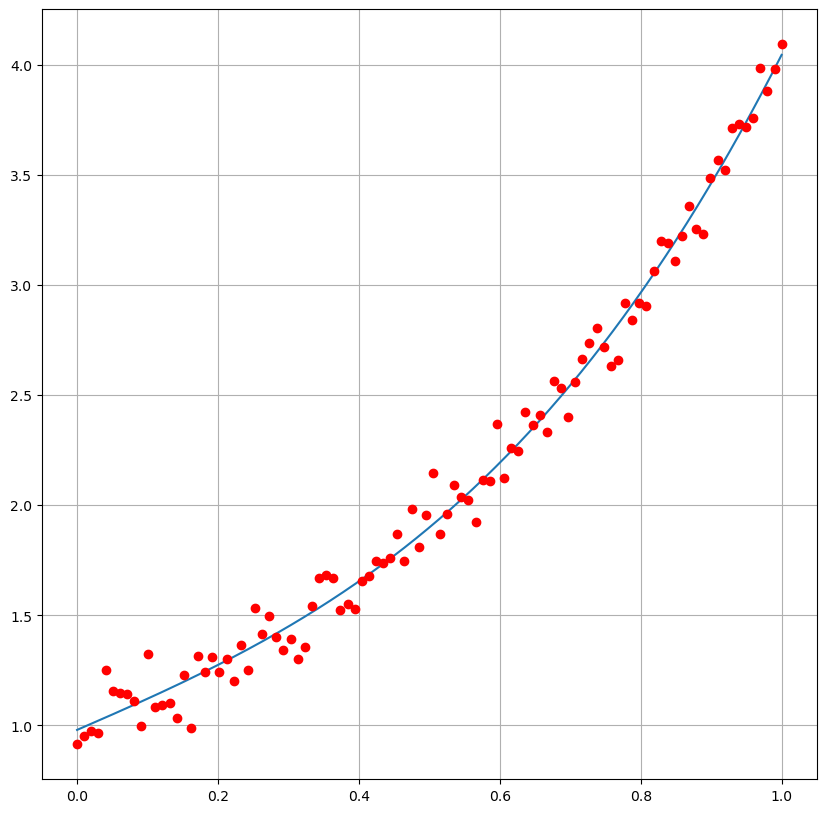

In [40]:
# plot f_theta(x) in the same plot of X and Y to check the approximation
def f_theta(theta_mle, phi):
    return phi @ theta_mle


XX = np.linspace(a, b, 1000)
YY = vandermonde(XX, K) @ theta_mle


plt.figure(figsize=(10,10))
plt.plot(XX, YY)
plt.grid()
plt.plot(X, Y, 'ro')

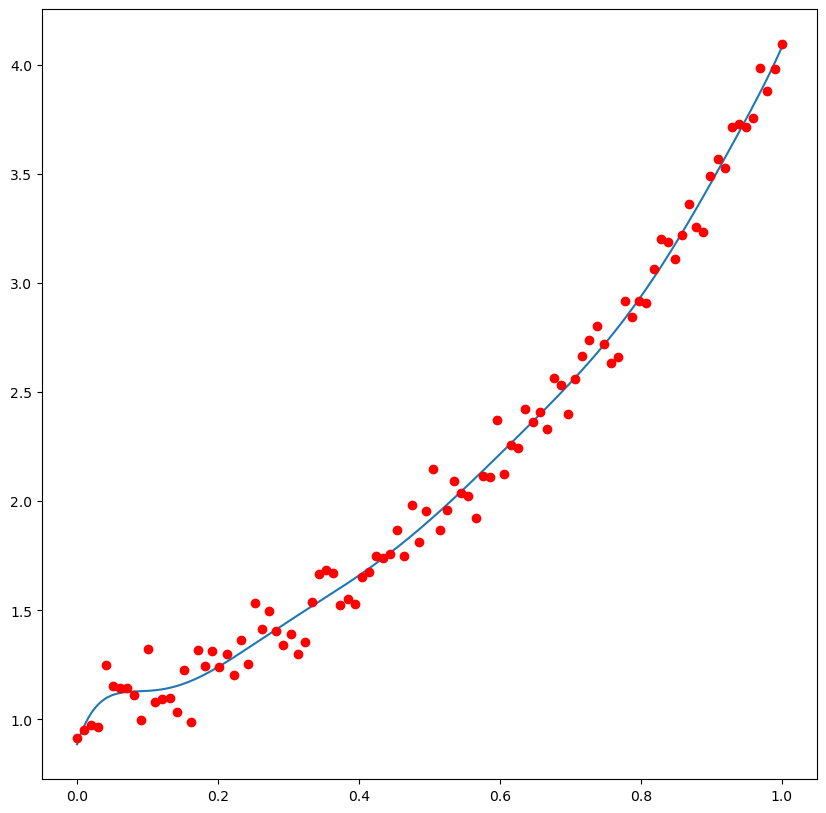

In [90]:
# X and Y are fixed
# Pretend to not know K


K_trial = 10

XX = np.linspace(a, b, 10000)

# Solve MLE with K trial = 2
Phi_trial = vandermonde(X, K_trial)
theta_mle_trial = np.linalg.solve((Phi_trial.T @ Phi_trial), Phi_trial.T @ Y)


#theta_mle_trial = np.linalg.inv((Phi_trial.T @ Phi_trial)) @ Phi_trial.T @ Y 
YY = vandermonde(XX, K_trial) @ theta_mle_trial



plt.figure(figsize=(10,10))
plt.plot(XX, YY)
plt.plot(X, Y, 'ro')

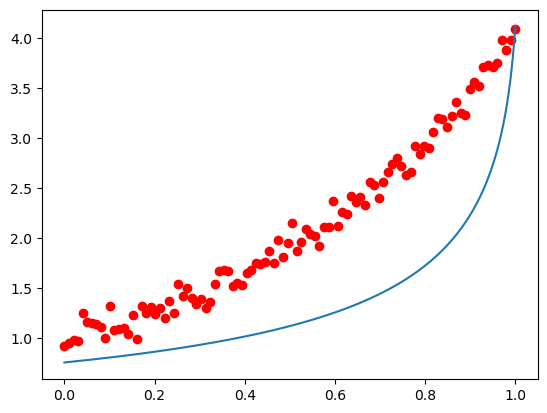

In [115]:
# X and Y are fixed

# Set lambda

lmb = 100

k_trial = 320

# Compute vandermonde for the problem
phi_map = vandermonde(X, k_trial)

# Solve theta_map
theta_map = np.linalg.solve(phi_map.T @ phi_map + (np.identity(k_trial) * lmb), phi_map.T @ Y)

XX = np.linspace(a, b, 1000)


Y_map = phi_map @ theta_map

YY = vandermonde(XX, k_trial) @ theta_map

plt.plot(X, Y, 'ro')
plt.plot(XX, YY)
